In [226]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, 
ConfusionMatrixDisplay, roc_curve, auc

In [227]:
train = pd.read_csv('train.csv')

In [228]:
#Create dummy variables that will give categorical values a label
train = pd.get_dummies(train, 
                     columns = ['Sex', 'Embarked', 'Pclass']) 

In [229]:
#Drop columns not needed for imputation
train = train.drop(['PassengerId','Cabin','Name','Ticket'], axis =1 )

In [230]:
#Create new column that holds total family size
train['Family_size'] = train['SibSp'] + train['Parch']

In [231]:
#look at the sum of missing values 
train.isna().sum()

Survived         0
Age            177
SibSp            0
Parch            0
Fare             0
Sex_female       0
Sex_male         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
Pclass_1         0
Pclass_2         0
Pclass_3         0
Family_size      0
dtype: int64

In [232]:
#Create true values to compare to predicted values after imputation 
true_values = pd.DataFrame(train)
true_values = train.dropna(axis=0, subset=['Age'])
#Ensure no other missing values are in df
true_values.isna().sum()

Survived       0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
Pclass_1       0
Pclass_2       0
Pclass_3       0
Family_size    0
dtype: int64

Text(0, 0.5, 'Frequency')

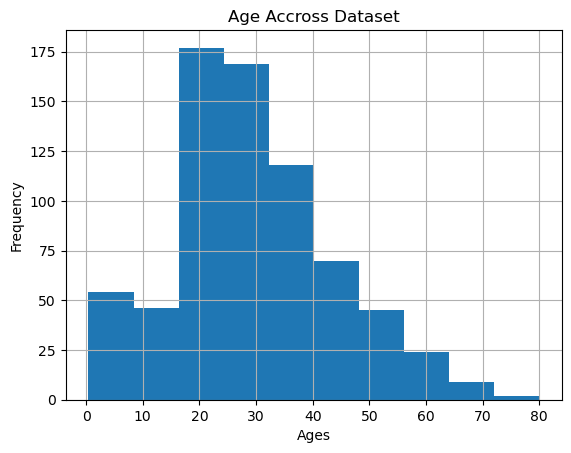

In [233]:
#Check the distribution accross ages is even
train['Age'].hist(bins = 10)
plt.title('Age Accross Dataset')
plt.xlabel('Ages')
plt.ylabel('Frequency')

In [234]:
#Drop missing data from the age column 
train = train.dropna(axis=0, subset=['Age'])
#Ensure no other missing values are in df
train.isna().sum()

Survived       0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
Pclass_1       0
Pclass_2       0
Pclass_3       0
Family_size    0
dtype: int64

In [235]:
#shape of train df
train.shape

(714, 14)

In [236]:
#10% of the train df is turned into null 
true_values_ix = train.sample(frac=0.10).index
new_df = train.loc[true_values_ix ,'Age'] = np.NaN

In [237]:
#shape of true values ensure they're the same 
true_values.shape

(714, 14)

In [238]:
#make df into array for imputation 
train_X = np.array(train)
#Create imputer, set to Linear Regression 
imp = IterativeImputer(estimator=LinearRegression(), max_iter=50, imputation_order='roman', skip_complete=True)
#Fit train dataset 
imp.fit(train_X)
imp.transform
#create dataframe with imputed values 
imputed_train1 = pd.DataFrame(imp.transform(train_X), columns = train.columns)
#Remove float integers from Age column 
imputed_train1['Age'] = imputed_train1['Age'].fillna(-1).astype('int64')

#Calculate the Mean Absolute Error and R-squared with imputed train df and true values 
mae = mean_absolute_error(imputed_train1, true_values)
r_squared = r2_score(imputed_train1, true_values)
print("Mean Absolute Error:", mae.round(2))
print("R-squared (R²):", r_squared.round(2))


Mean Absolute Error: 0.09
R-squared (R²): 0.99


In [239]:
###Fill in the real missing values 

In [240]:
train1 = pd.read_csv('train.csv')

In [241]:
#Create dummy variables 
train1 = pd.get_dummies(train1, 
                     columns = ['Sex', 'Embarked', 'Pclass']) 
#Drop columns not needed for imputation 
train1 = train1.drop(['PassengerId','Cabin','Name','Ticket'], axis =1 )

In [242]:
#Create new column off combing sibling count and parents/spouses 
train1['Family_size'] = train1['SibSp'] + train1['Parch']

In [243]:
#make df into array for imputation 
train_x = np.array(train1)
#Fit train1 dataset
imp.fit(train_x)
imp.transform
#create dataframe with imputed values this df will be used for LR 
imputed_train = pd.DataFrame(imp.transform(train_x), columns = train1.columns)
#Remove float integers from Age column 
imputed_train['Age'] = imputed_train['Age'].fillna(-1).astype('int64')
#Ensure there are no missing values 
imputed_train.isna().sum()

Survived       0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
Pclass_1       0
Pclass_2       0
Pclass_3       0
Family_size    0
dtype: int64

Text(0, 0.5, 'Frequency')

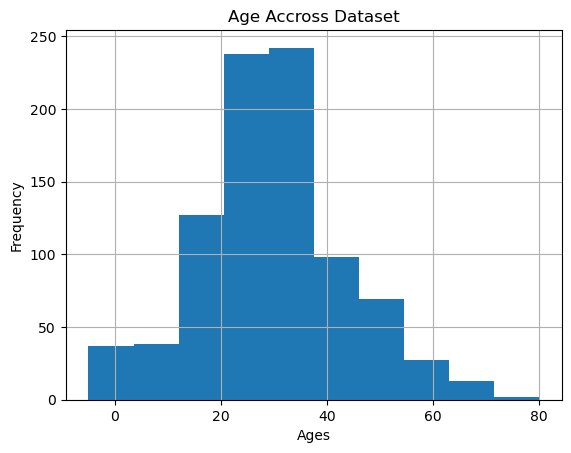

In [244]:
#View if data is still evenly distributed with new values 
imputed_train['Age'].hist(bins = 10)
plt.title('Age Accross Dataset')
plt.xlabel('Ages')
plt.ylabel('Frequency')

In [245]:
##Process to use imputed df in LR algorithm 

In [246]:
#Drop survived column from imputed train df
X = imputed_train.drop('Survived',axis=1)
y = imputed_train['Survived']

In [247]:
#split df, 35% test size 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=23) 

In [248]:
#Fit model with logistic regression algorithm - use liblinear online solver 
model = LogisticRegression(solver = 'liblinear', random_state=0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [249]:
#Print model metrics 
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84       196
         1.0       0.74      0.67      0.70       116

    accuracy                           0.79       312
   macro avg       0.78      0.76      0.77       312
weighted avg       0.79      0.79      0.79       312

[[168  28]
 [ 38  78]]


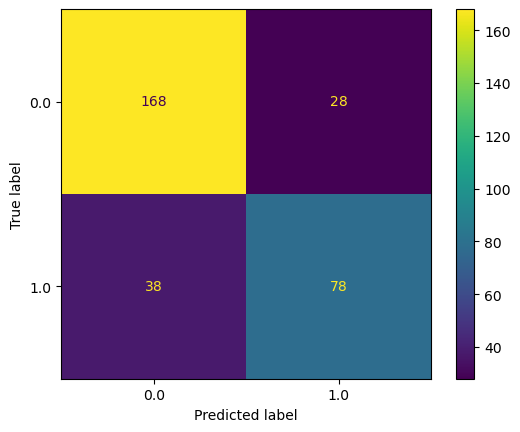

In [250]:
#Plot confusion matrix 
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [251]:
#Final process with test dataset 

In [252]:
test = pd.read_csv('test.csv')
testresults = pd.read_csv('gender_submission.csv')

In [253]:
#Check for missing values 
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [254]:
#Create dummy variables 
test = pd.get_dummies(test,columns = ['Sex', 'Embarked', 'Pclass']) 

In [255]:
#Create new family size column 
test['Family_size'] = test['SibSp'] + test['Parch']

In [256]:
#Drop columns not needed for imputation 
test = test.drop(['PassengerId','Cabin','Name','Ticket'], axis =1 )

In [257]:
#Ensure new columns are made and columns were dropped 
test.isna().sum()

Age            86
SibSp           0
Parch           0
Fare            1
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
Pclass_1        0
Pclass_2        0
Pclass_3        0
Family_size     0
dtype: int64

In [258]:
#Fill in 'Fare' missing value found above 

In [259]:
#Find missing value in df 
print(test[test['Fare'].isnull()])

      Age  SibSp  Parch  Fare  Sex_female  Sex_male  Embarked_C  Embarked_Q  \
152  60.5      0      0   NaN           0         1           0           0   

     Embarked_S  Pclass_1  Pclass_2  Pclass_3  Family_size  
152           1         0         0         1            0  


In [260]:
#Create temp df for class 3 passengers 
class3 = (test.loc[(test['Pclass_3']==1)])

In [261]:
#calculate fare mean from class 3 passengers 
test_fare = class3['Fare'].mean()
test_fare

12.459677880184334

In [262]:
#fill in the missing value with the mean of class 3 
test['Fare'].fillna(int(class3['Fare'].mean()), inplace=True)

In [263]:
#Make sure value was filled in correctly 
value = 60.5
 
result = test[test['Age'] == value]
 
result

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family_size
152,60.5,0,0,12.0,0,1,0,0,1,0,0,1,0


In [264]:
#Ensure there is no other missing values 
test.isna().sum()

Age            86
SibSp           0
Parch           0
Fare            0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
Pclass_1        0
Pclass_2        0
Pclass_3        0
Family_size     0
dtype: int64

In [265]:
#Convert to array 
test1 = np.array(test)
#fit array to model created 
imp.fit(test1)
imp.transform
#create dataframe with imputed values
imputed_test = pd.DataFrame(imp.transform(test1), columns = test.columns)
#Remove float integers from Age column 
imputed_test['Age'] = imputed_test['Age'].fillna(-1).astype('int64')
#Ensure there are no missing values 
imputed_test.isna().sum()

Age            0
SibSp          0
Parch          0
Fare           0
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
Pclass_1       0
Pclass_2       0
Pclass_3       0
Family_size    0
dtype: int64

In [266]:
#Drop paddengerID from gender_submission df 
testresults.drop('PassengerId', axis=1, inplace =True)

In [267]:
#Print model metrics
predictions = model.predict(imputed_test)
print(classification_report(testresults,predictions))
print(confusion_matrix(testresults,predictions))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       266
           1       0.88      0.89      0.88       152

    accuracy                           0.91       418
   macro avg       0.91      0.91      0.91       418
weighted avg       0.91      0.91      0.91       418

[[247  19]
 [ 17 135]]


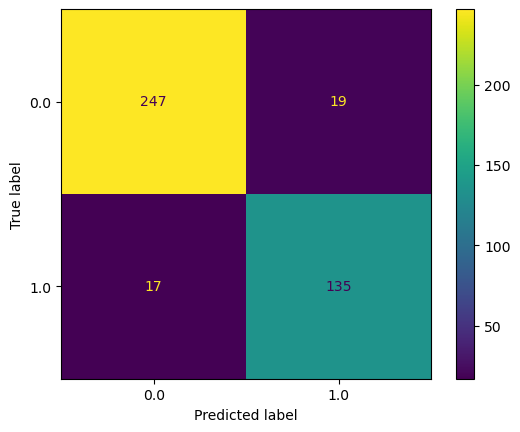

In [268]:
#Plot confusion matrix 
cm = confusion_matrix(testresults, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

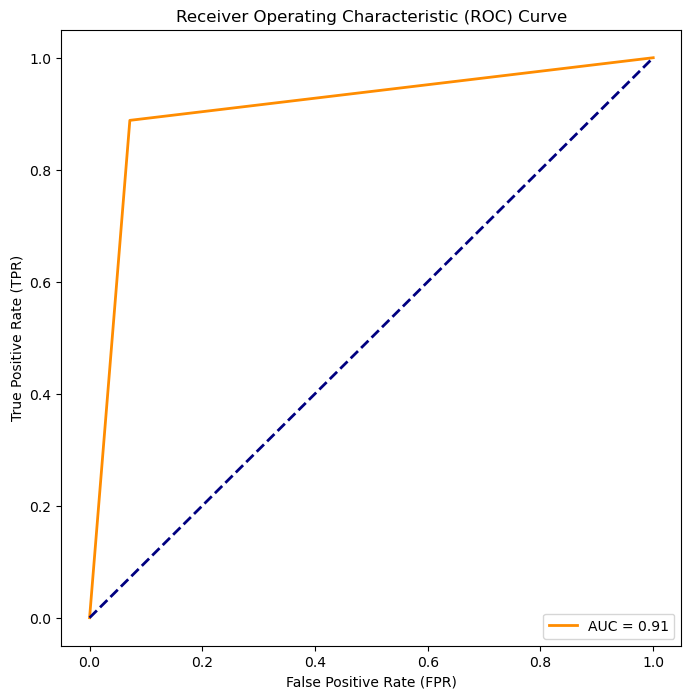

In [269]:
# Metrics for the ROC curve
fpr, tpr, thresholds = roc_curve(testresults, predictions )
# Compute Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

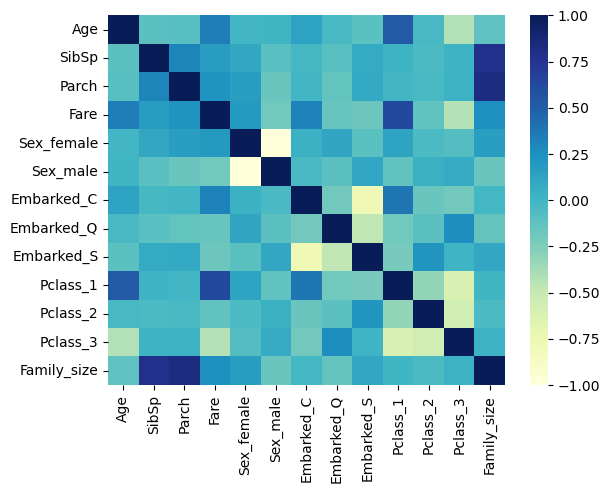

In [270]:
#Plot correlations from imputed test df
dataplot = sns.heatmap(imputed_test.corr(), cmap="YlGnBu") 

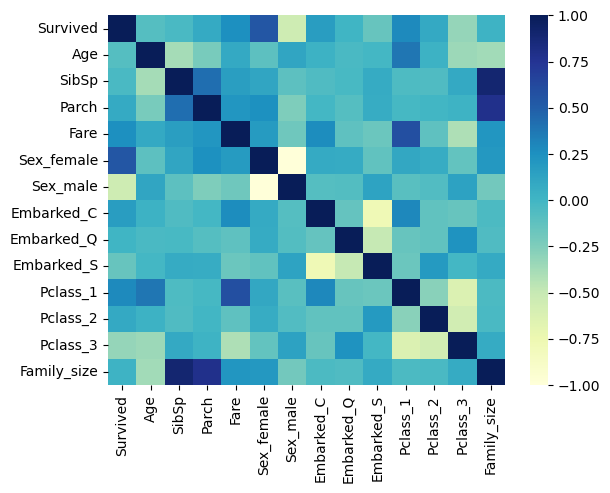

In [271]:
#Plot correlations from imputed train df
dataplot = sns.heatmap(imputed_train.corr(), cmap="YlGnBu") 

In [225]:
#Convert to csv 
#imputed_train.to_csv('imputed_train.csv')
#imputed_test.to_csv('imputed_test.csv')